In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
data_dict = unpickle('./data/data_batch_1')
data = data_dict[b'data']
labels = data_dict[b'labels']
for i in range(2,6):
    data_dict = unpickle('./data/data_batch_'+str(i))
    data = np.concatenate((data, data_dict[b'data']))
    labels = np.concatenate((labels, data_dict[b'labels']))

In [4]:
data=(data[:,0:1024]+data[:,1024:2048]+data[:,2048:3072])/3

In [5]:
classes = []
means = []
for i in range(10):
    classes.append(data[labels==i])
for i in range(10):
    means.append(np.mean(classes[i],0))

In [6]:
pc20_eigvecs_classes = []
pc20_eigvals_classes = []
for i in range(10):
    class_data = classes[i]
    class_mean = means[i]
    class_cov  = np.cov(class_data.T)
    evals,evecs = np.linalg.eigh(class_cov)
    evals = evals[::-1]
    evecs = evecs.T[::-1].T
    pc20_eigvecs_classes.append(evecs[:,:20])
    pc20_eigvals_classes.append(evals[:20])

In [7]:
projected_class_data = []
for i in range(10):
    reduced = np.matmul(classes[i],pc20_eigvecs_classes[i])
    projected_class_data.append(reduced)

In [8]:
errors = []
for i in range(10):
    # taking norms along rows(images)
    norms_og = np.linalg.norm(classes[i],axis=1)
    # taking norms of projected
    norms_proj = np.linalg.norm(projected_class_data[i],axis=1)
    error = (1/5000)*( np.sum(np.sqrt( np.square(norms_og)-np.square(norms_proj) )) )
    errors.append(error)

[578.15697987 678.66787608 627.12153859 662.57142198 671.26221752
 666.92476072 695.56446513 673.57844967 614.81361072 676.65901035]


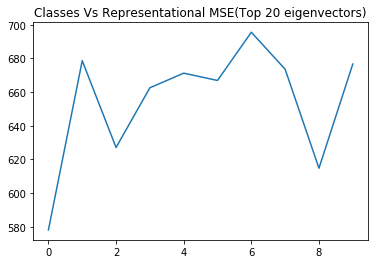

In [10]:
print(errors)
errors = np.array(errors)
plt.plot(errors)
plt.title('Classes Vs Representational MSE(Top 20 eigenvectors)')
plt.show()